The POP ocean model grid in CESM is curvalinear, which makes it hard to plot. The following is a demo of how to plot POP output using cartopy

Cartopy documentation is here: https://scitools.org.uk/cartopy/docs/latest/

Projections are here: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

Generally we want an area preserving projection that minimizes distortion and shows all of the oceans as seamlessly as possible

In [5]:
%matplotlib inline
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import cmocean # pretty colormaps for oceanography (optional)

import cartopy
import cartopy.crs as ccrs

/anaconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


## Making a cartopy map

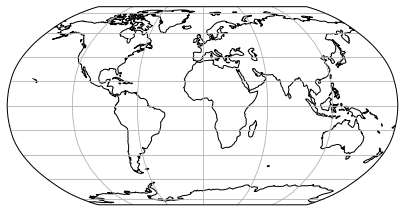

In [143]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m')
ax.gridlines()

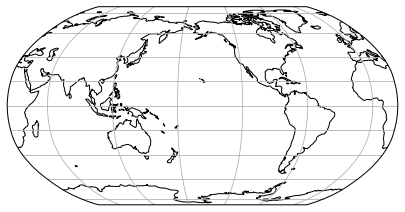

In [121]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 203))
ax.coastlines(resolution='110m')
ax.gridlines()

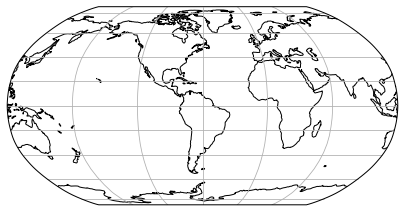

In [122]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 300))
ax.coastlines(resolution='110m')
ax.gridlines()

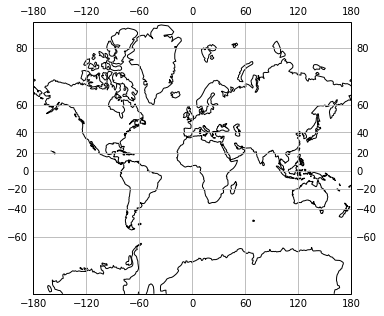

In [144]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
# note this has grid labels, this is being updated for all projections in the latest version of cartopy 0.18.0

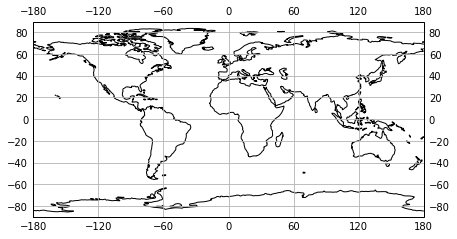

In [145]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

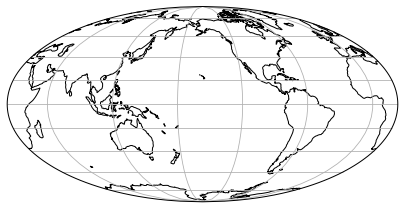

In [146]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Mollweide(central_longitude = 203))
ax.coastlines(resolution='110m')
ax.gridlines()

## Plotting model data in cartopy

In [123]:
# get some POP grid data to plot

file = '/Users/zti318/Documents/Research/Clim_var/Fisheries_metric/Data/mean.nday1.nc'

ds = xr.open_dataset(file, decode_times=False)

In [124]:
# restrict the dataset to only the variable we need, SST (so the function call below goes faster)
varname = 'SST'
ds = ds.drop([v for v in ds.variables if v not in ['TLAT', 'TLONG', 'KMT', varname]])

In [125]:
ds

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 1)
Coordinates:
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon, time
Data variables:
    KMT      (nlat, nlon) float64 ...
    SST      (time, nlat, nlon) float32 ...
Attributes:
    title:                     g.e11.G.T62_g16.eco_x1_analog.001
    history:                   Wed Feb 17 16:45:54 2016: ncra mean.nday1.0002...
    Conventions:               CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netc...
    contents:                  Diagnostic and Prognostic Variables
    source:                    CCSM POP2, the CCSM Ocean Component
    revision:                  $Id: tavg.F90 41939 2012-11-14 16:37:23Z mlevy...
    calendar:                  All years have exactly  365 days.
    start_time:                This dataset was created on 2016-02-16 at 20:0...
    cell_methods:              cell_methods = time: mean ==> the variable val...
    nsteps_total:    

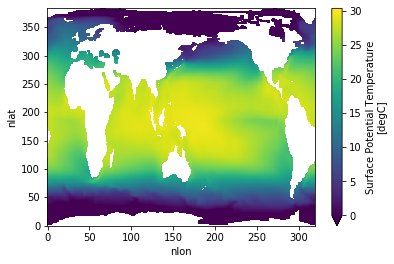

In [160]:
# plot with native xarray/matplotlib command

ds.SST.plot(vmin = 0)

# note seam is in the middle of the Atlantic

Note we have to make the SST data two dimensional, here are three ways to do this:

In [136]:
ds.SST.isel(time=0)

<xarray.DataArray 'SST' (nlat: 384, nlon: 320)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [-1.716299, -1.704369, -1.689177, ...,       nan,       nan,       nan],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan]],
      dtype=float32)
Coordinates:
    TLONG    (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Surface Potential Temperature
    units:         degC
    grid_loc:      2110
    cell_methods:  time: mean time: mean time: mean

In [138]:
ds.SST[0,:,:]

<xarray.DataArray 'SST' (nlat: 384, nlon: 320)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [-1.716299, -1.704369, -1.689177, ...,       nan,       nan,       nan],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan]],
      dtype=float32)
Coordinates:
    TLONG    (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Surface Potential Temperature
    units:         degC
    grid_loc:      2110
    cell_methods:  time: mean time: mean time: mean

In [141]:
ds.SST.squeeze()

<xarray.DataArray 'SST' (nlat: 384, nlon: 320)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [-1.716299, -1.704369, -1.689177, ...,       nan,       nan,       nan],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan]],
      dtype=float32)
Coordinates:
    TLONG    (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Surface Potential Temperature
    units:         degC
    grid_loc:      2110
    cell_methods:  time: mean time: mean time: mean

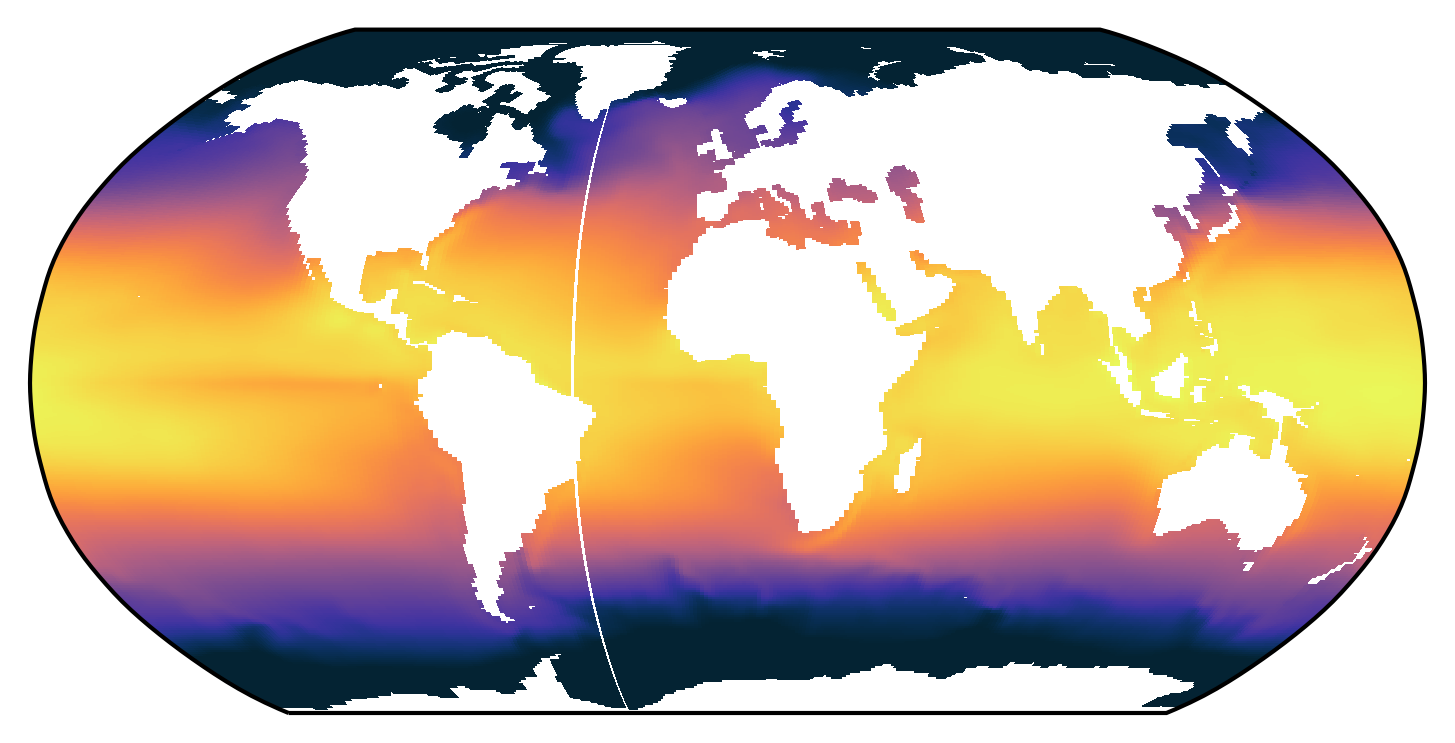

In [161]:
# put data on the plot
# note seam issue, we will fix this

# define the figure and axes as before
plt.figure(dpi=300)
ax = plt.axes(projection=ccrs.Robinson())

# alternate syntax to above:
#ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
#fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.Robinson()))

# plot data
pc = ax.pcolormesh(ds.TLONG, ds.TLAT, ds.SST.squeeze(),
                   cmap = cmocean.cm.thermal,   
                   vmin=0,vmax=30,
                   transform=ccrs.PlateCarree()) #this is always needed


#ax.coastlines(resolution='110m')
#ax.gridlines()

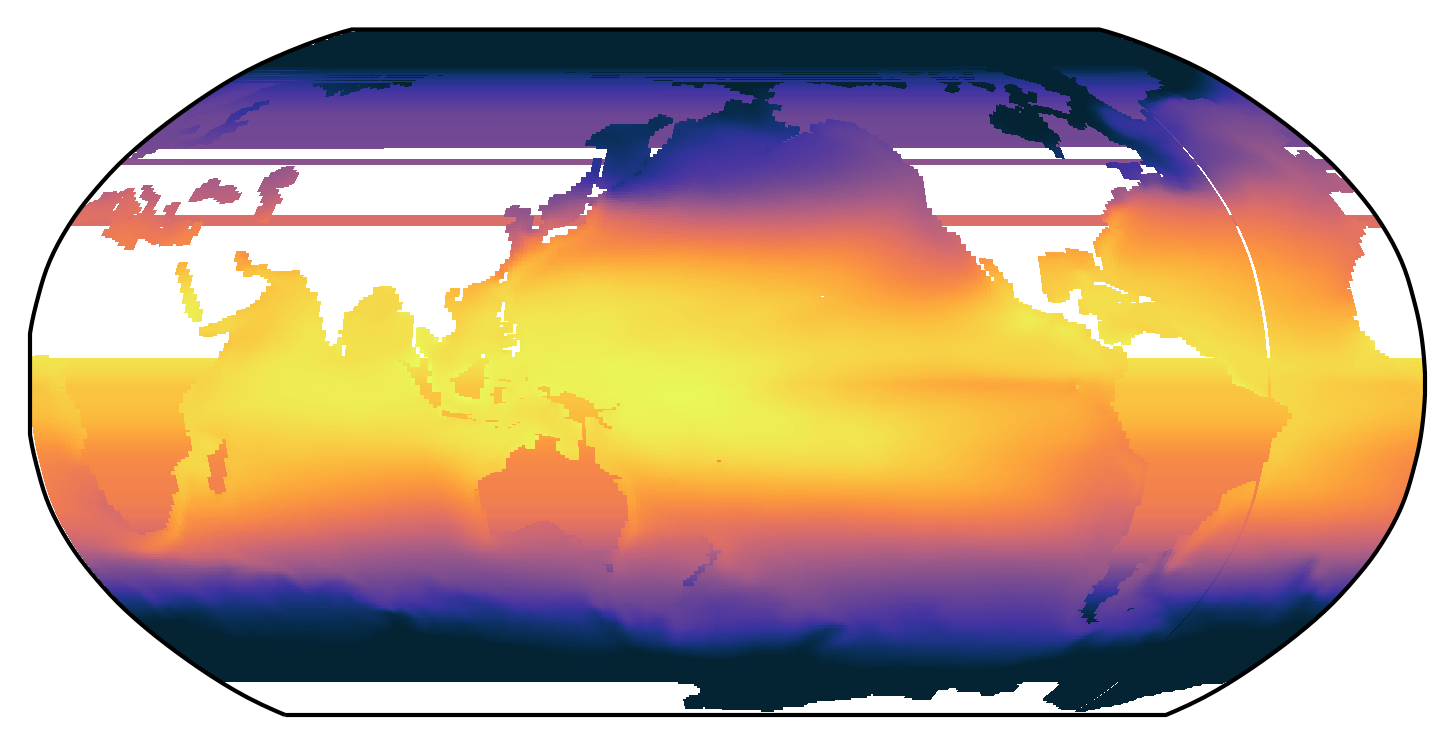

In [156]:
# note that some central angles will give you issues
fig = plt.figure(dpi=300)
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 180))

pc = ax.pcolormesh(ds.TLONG, ds.TLAT, ds.SST.squeeze(),
                   cmap = cmocean.cm.thermal,   
                   vmin=0,vmax=30,
                   transform=ccrs.PlateCarree()) #this is always needed

We have two issues here. The first is there is a seam issue which appears where the model grid ends. Second is the plotting gets confused when we use some angles of rotation. Both of these can be fixed by adding a cyclic point where the seam is.

## Fixing the seam and rotation issues

Cartopy has a buiit in utility for dealing with the seam issue. This only works for 1D longitude grids. POP has a curvalinear 2D grid 


In [119]:
from cartopy.util import add_cyclic_point
cdata, clon  = add_cyclic_point(ds.SST, coord=ds.TLONG)

ValueError: The coordinate must be 1-dimensional.

The following function is from Matt Long at NCAR. It modifies the CESM-POP TLONG variable to be monotonically increasing and adds a cyclic point for plotting with cartopy. It should work for both low and hi res CESM

see https://gist.github.com/matt-long/018ac5a24d82a7f1812f0a067d5dbe0e

In [165]:
import numpy as np
import xarray as xr


def pop_add_cyclic(ds):
    
    nj = ds.TLAT.shape[0] # size of POP grid
    ni = ds.TLONG.shape[1]

    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = ds.TLONG.data
    tlat = ds.TLAT.data
    
    tlon = np.where(np.greater_equal(tlon, min(tlon[:,0])), tlon-360., tlon) #make monotoncially increasing
    lon  = np.concatenate((tlon, tlon + 360.), 1) # concatenate to make larger array
    lon = lon[:, xL:xR] #restrict to middle rane

    if ni == 320: # this is the x1 POP grid
        lon[367:-3, 0] = lon[367:-3, 0] + 360.        
    lon = lon - 360.
    
    lon = np.hstack((lon, lon[:, 0:1] + 360.)) # add in cyclic point
    if ni == 320:
        lon[367:, -1] = lon[367:, -1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:, 0] = lon[:, 0] - 1e-8

    #-- periodicity
    lat = np.concatenate((tlat, tlat), 1)
    lat = lat[:, xL:xR]
    lat = np.hstack((lat, lat[:,0:1]))

    TLAT = xr.DataArray(lat, dims=('nlat', 'nlon'))
    TLONG = xr.DataArray(lon, dims=('nlat', 'nlon'))
    
    dso = xr.Dataset({'TLAT': TLAT, 'TLONG': TLONG})

    # copy vars
    varlist = [v for v in ds.data_vars if v not in ['TLAT', 'TLONG']]
    for v in varlist:
        v_dims = ds[v].dims
        if not ('nlat' in v_dims and 'nlon' in v_dims):
            dso[v] = ds[v]
        else:
            # determine and sort other dimensions
            other_dims = set(v_dims) - {'nlat', 'nlon'}
            other_dims = tuple([d for d in v_dims if d in other_dims])
            lon_dim = ds[v].dims.index('nlon')
            field = ds[v].data
            field = np.concatenate((field, field), lon_dim)
            field = field[..., :, xL:xR]
            field = np.concatenate((field, field[..., :, 0:1]), lon_dim)       
            dso[v] = xr.DataArray(field, dims=other_dims+('nlat', 'nlon'), 
                                  attrs=ds[v].attrs)


    # copy coords
    for v, da in ds.coords.items():
        if not ('nlat' in da.dims and 'nlon' in da.dims):
            dso = dso.assign_coords(**{v: da})
                
            
    return dso

In [163]:
ds

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 1)
Coordinates:
    TLONG    (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
Dimensions without coordinates: nlat, nlon, time
Data variables:
    KMT      (nlat, nlon) float64 ...
    SST      (time, nlat, nlon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    title:                     g.e11.G.T62_g16.eco_x1_analog.001
    history:                   Wed Feb 17 16:45:54 2016: ncra mean.nday1.0002...
    Conventions:               CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netc...
    contents:                  Diagnostic and Prognostic Variables
    source:                    CCSM POP2, the CCSM Ocean Component
    revision:                  $Id: tavg.F90 41939 2012-11-14 16:37:23Z mlevy...
    calendar:                  All years have exactly  365 days.
    start_time:                This dataset was created on 2016-02-

In [166]:
# apply the function to create a new dataset with the cyclic point added. This new dataset will be used in plotting 

dso = pop_add_cyclic(ds)

In [167]:
dso # note that nlon is bigger because of the added cyclic point

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 321, time: 1)
Dimensions without coordinates: nlat, nlon, time
Data variables:
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 80.31 80.31 80.31
    TLONG    (nlat, nlon) float64 -220.6 -219.4 -218.3 ... -39.29 -39.57 -39.86
    KMT      (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SST      (time, nlat, nlon) float32 nan nan nan nan nan ... nan nan nan nan

Text(0.5, 1.0, 'No Seam!')

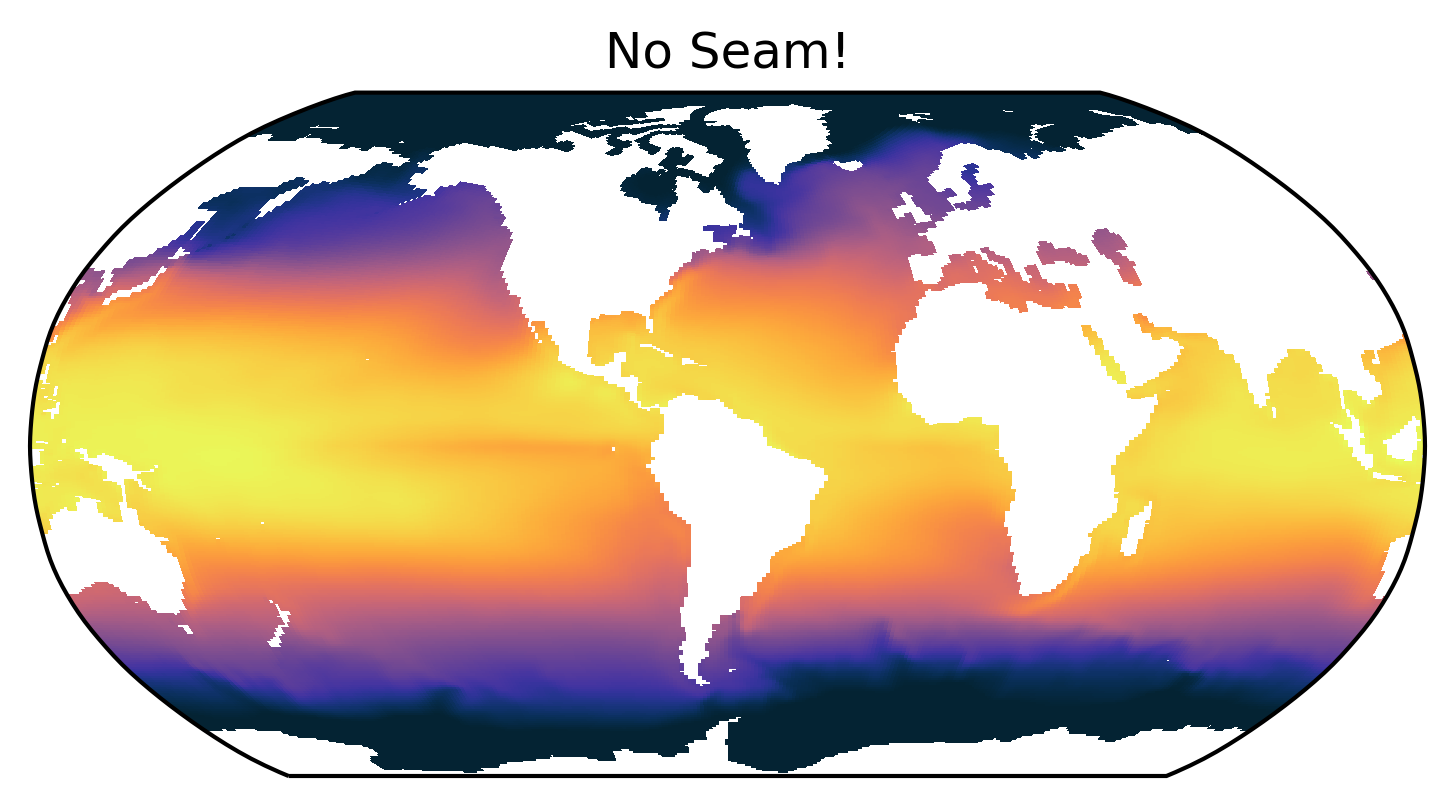

In [175]:
fig = plt.figure(dpi=300)

ax = plt.subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=300.0))

pc = ax.pcolormesh(dso.TLONG, dso.TLAT, dso.SST.isel(time=0),
                   cmap=cmocean.cm.thermal,
                   vmin=0, vmax=30,
                   transform=ccrs.PlateCarree())
plt.title('No Seam!')

Text(0.5, 1.0, 'Better')

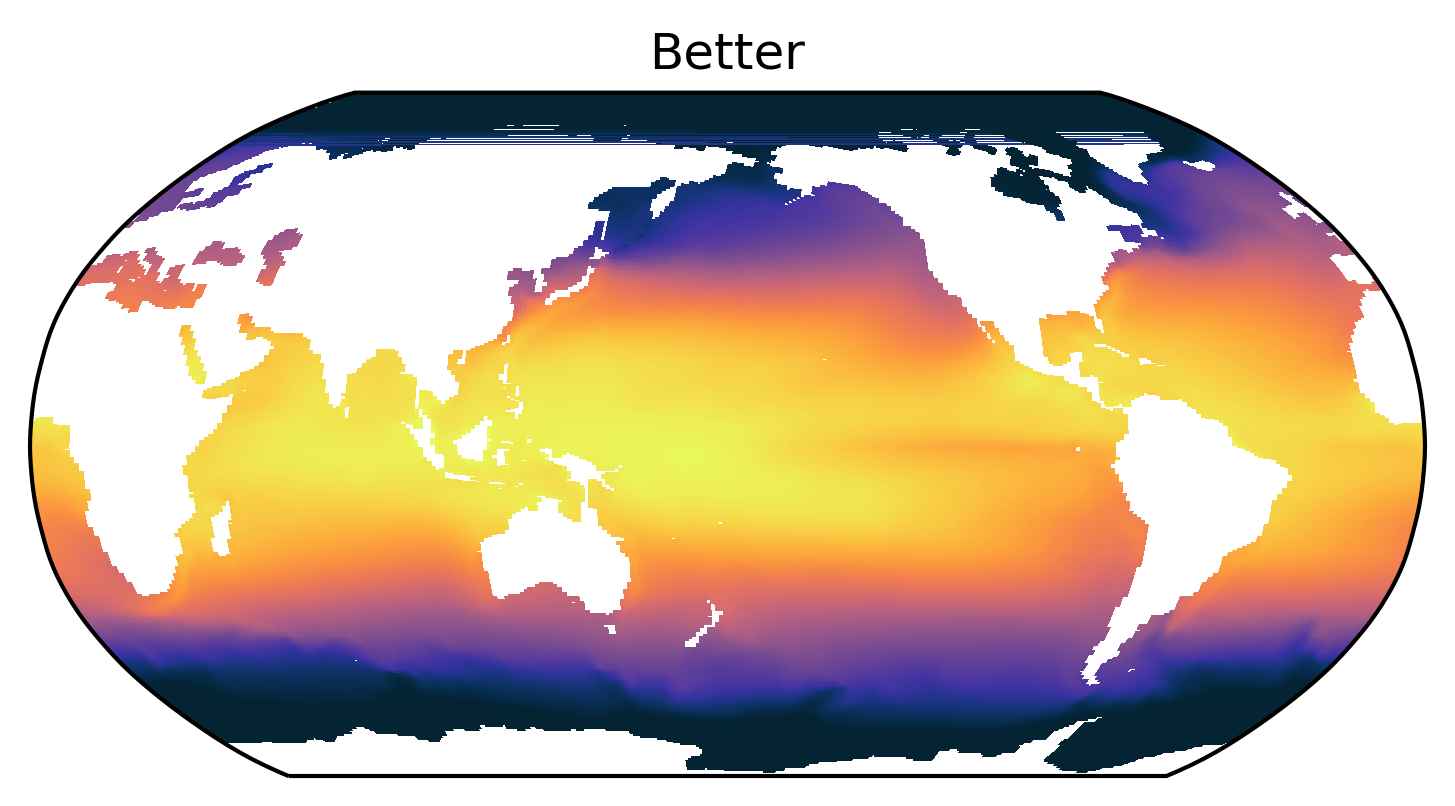

In [189]:
# note that some central angles will give you issues
fig = plt.figure(dpi=300)
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 180))

pc = ax.pcolormesh(dso.TLONG, dso.TLAT, dso.SST.squeeze(),
                   cmap = cmocean.cm.thermal,   
                   vmin=0,vmax=30,
                   transform=ccrs.PlateCarree()) #this is always needed

plt.title('Better')
# the wonkiness is better, but still falls apart at high latitudes where there is a discontinuity in the grid. 
# How well this is rendered depends on the projection
# Conclusion, best to pick a central longitude that avoids this issue.


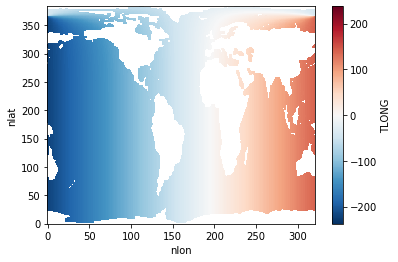

In [207]:
# note thre is a pole iin the grid above Russia, this is likely what is giving the issue
dso.TLONG.where(dso.KMT>0).plot()

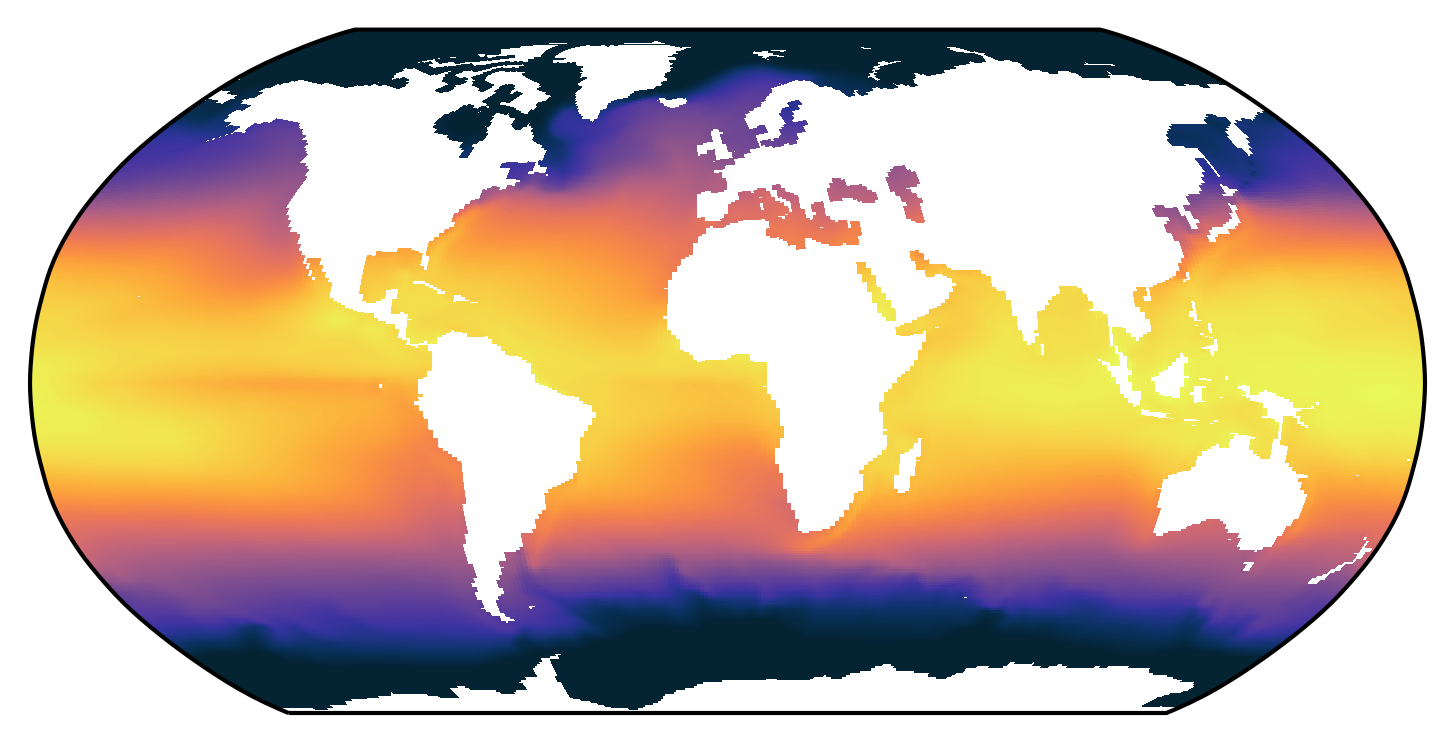

In [197]:
# note that some central angles will give you issues
fig = plt.figure(dpi=300)
ax = plt.axes(projection=ccrs.Robinson())

pc = ax.pcolormesh(dso.TLONG, dso.TLAT, dso.SST.squeeze(),
                   cmap = cmocean.cm.thermal,   
                   vmin=0,vmax=30,
                   transform=ccrs.PlateCarree()) #this is always needed


## Add some land and coastlines

To make the plot publication ready, we will add some coastlines and fill in the land. There are a number of ways to do this. Here I am also changing the projection because I like this one better.

Text(0.5, 1.0, '$\\degree$C')

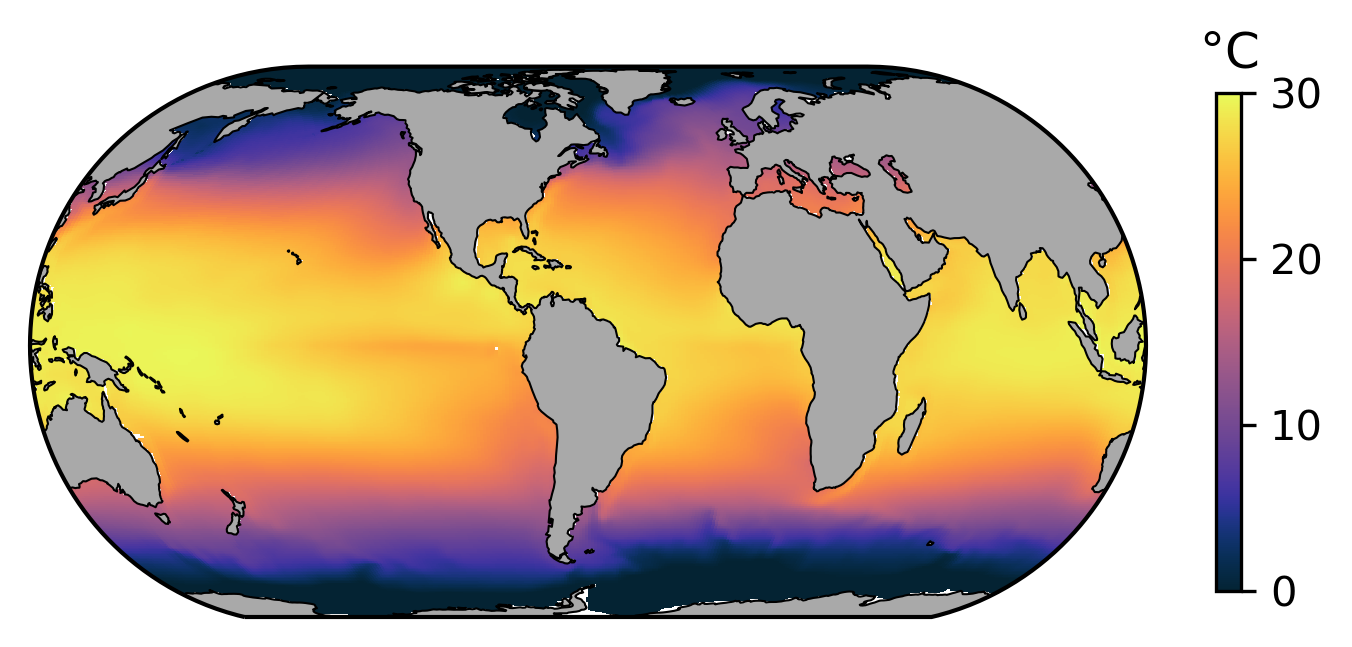

In [170]:
fig = plt.figure(dpi=300)

ax = plt.subplot(1, 1, 1, projection=ccrs.EckertIV(central_longitude=300.0))

pc = ax.pcolormesh(dso.TLONG, dso.TLAT, dso.SST.isel(time=0),
                   cmap=cmocean.cm.thermal,
                   vmin=0, vmax=30,
                   transform=ccrs.PlateCarree())

ax.set_global() 

land = ax.add_feature(
    cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                        linewidth=0.5,
                                        edgecolor='black',
                                        facecolor='darkgray'))

cb = plt.colorbar(pc, shrink=0.55)
cb.ax.set_title('$\degree$C')

## Adding the add cyclic function so that it can be imported

To do this, you have to put it in your python path, the list of directories that python interrogates when you import something. I'm following the tutorial here: https://www.devdungeon.com/content/python-import-syspath-and-pythonpath-tutorial
I'm on a mac, but there are instructions for windows as well

In [1]:
import sys

In [2]:
sys.path

['/Users/zti318/Downloads',
 '/Users/zti318/Python',
 '/anaconda3/lib/python37.zip',
 '/anaconda3/lib/python3.7',
 '/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/anaconda3/lib/python3.7/site-packages',
 '/anaconda3/lib/python3.7/site-packages/aeosa',
 '/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/zti318/.ipython']

I've moved the pop add cyclic function to a file pop_util.py and put it in /Users/zti318/Python. I need to add this folder to my path

In [3]:
sys.path.append('/Users/zti318/Python')

In [4]:
sys.path

['/Users/zti318/Downloads',
 '/Users/zti318/Python',
 '/anaconda3/lib/python37.zip',
 '/anaconda3/lib/python3.7',
 '/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/anaconda3/lib/python3.7/site-packages',
 '/anaconda3/lib/python3.7/site-packages/aeosa',
 '/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/zti318/.ipython',
 '/Users/zti318/Python']

But this only adds it for this session. I want to add that folder permanently. To do this I need to modify my PYTHONPATH macOS environmental variable following the instructions here: https://bic-berkeley.github.io/psych-214-fall-2016/using_pythonpath.html

In [5]:
import pop_util

Works!